In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

In [3]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

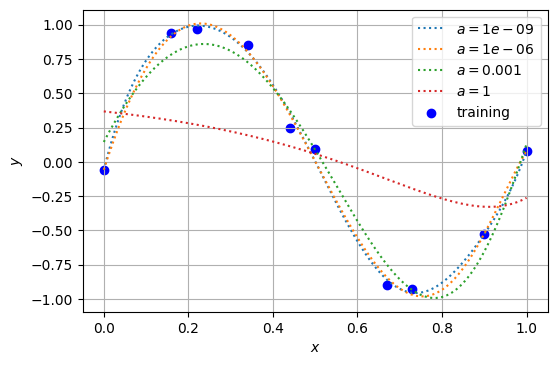

In [7]:
# Q1
def draw_lidge(X, Y, a):
  X_2 = np.array([[x ** i for i in range(10)] for x in X])
  X_2_T = np.transpose(X_2)
  Y_T = np.array([[y] for y in Y])
  W = np.dot(np.dot(np.linalg.inv(np.dot(X_2_T, X_2) + a * np.eye(10)), X_2_T), Y_T)
  x = np.linspace(0, 1, 1000)
  ax.plot(x, W[0] +\
          W[1] * x ** 1+\
          W[2] * x ** 2+\
          W[3] * x ** 3+\
          W[4] * x ** 4+\
          W[5] * x ** 5+\
          W[6] * x ** 6+\
          W[7] * x ** 7+\
          W[8] * x ** 8+\
          W[9] * x ** 9\
          ,  label=r'$a={}$'.format(a), linestyle="dotted")
  return W
  
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b', label="training")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


W_dic = {}
A = [10 ** (-9), 10 ** (-6), 10 ** (-3), 1]
for a in A:
  W_dic[a] = draw_lidge(X, Y, a)
plt.legend(loc='upper right')
ax.grid()

In [5]:
# Q2

def calculate_norm(W):
  sum = 0
  for w in W:
    sum += w ** 2
  return int(sum)

for key, value in W_dic.items():
  print('d = {}: |W|_2^2 = {}'.format(key, calculate_norm(value)))

d = 1e-09: |W|_2^2 = 210397
d = 1e-06: |W|_2^2 = 714
d = 0.001: |W|_2^2 = 254
d = 1: |W|_2^2 = 0


In [10]:
# Q3
X_valid = np.array([ 0.05,  0.08,  0.12,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.99])
Y_valid = np.array([ 0.35,  0.58,  0.68,  0.87,  0.83,  0.45,  0.01, -0.36, -0.83, -0.06])
X_valid_2 = np.array([[x ** i for i in range(10)] for x in X_valid])
Y_valid_T = np.array([[y] for y in Y_valid])

def calculate_MSR(X, Y, W):
  return np.linalg.norm(Y - np.dot(X, W), 2) / 10

X_2 = np.array([[x ** i for i in range(10)] for x in X])
Y_T = np.array([[y] for y in Y])
for key, value in W_dic.items():
  e_train = calculate_MSR(X_2, Y_T, value)
  e_valid = calculate_MSR(X_valid_2, Y_valid_T, value)
  print(f'd = {key}: MSR = {e_train:.10f} (training), {e_valid:.10f} (validation)')

# 実行結果よりd = 1e-06が最良

d = 1e-09: MSR = 0.0154498997 (training), 0.0324072870 (validation)
d = 1e-06: MSR = 0.0159239861 (training), 0.0317272120 (validation)
d = 0.001: MSR = 0.0388090333 (training), 0.0421787270 (validation)
d = 1: MSR = 0.1680975984 (training), 0.1314550528 (validation)


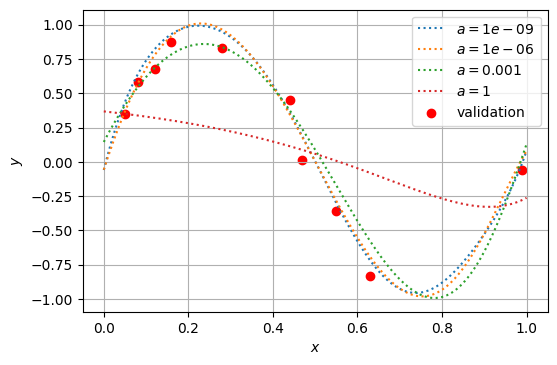

In [11]:
# validation dataと各モデルの図示
fig, ax = plt.subplots(dpi=100)
ax.scatter(X_valid, Y_valid, label='validation', marker='o', color='r')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


W_dic = {}
A = [10 ** (-9), 10 ** (-6), 10 ** (-3), 1]
for a in A:
  W_dic[a] = draw_lidge(X, Y, a)
plt.legend(loc='upper right')
ax.grid()